In [4]:
import time
import os  
from bs4 import BeautifulSoup as bs
import pandas as pd
import scipy as sc
import numpy as np
import requests
from lxml import html
import csv
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('coffee.csv')

In [6]:
df

,Coffee Name,Company Name,Origin country,Roaster Location:,Roast Level,Agtron,Price,Rating,Review Date,Aroma,Acidity,Body,Flavor,Aftertaste
0,Roadmap CoffeeWorks,Ethiopia Kayon Mountain,"Odo Shakiso District, Guji Zone, southern Ethi...","Lexington, Virginia",Light,64/82,$20.95/12 ounces,94,February 2023,9,9,9,9,8.0
1,Roadmap CoffeeWorks,El Salvador El Mirador,"Apaneca-Ilamatepec growing region, El Salvador","Lexington, Virginia",Medium-Light,60/77,$20.95/12 ounces,93,February 2023,9,8,9,9,8.0
2,Vermont Artisan Coffee & Tea,Panama Finca Las Nubes Geisha Microlot,"Boquete growing region, Panama","Waterbury Center, Vermont",Medium-Light,60/77,$15.00/8 ounces,94,February 2023,9,9,9,9,8.0
3,Durango Coffee Company,Kenya Karinga AA,"Kiambu County, Kenya","Durango, Colorado",Medium-Light,57/74,$19.95/12 ounces,93,February 2023,9,9,8,9,8.0
4,Nomadic Bean,Ethiopia Guji Odo Shakiso,"Guji Zone, Oromia Region, Southern Ethiopia","Jackson Hole, Wyoming",Light,62/82,$20.00/12 ounces,93,February 2023,9,8,9,9,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,Trader Joe's,Moka Java,Medium,"South Pasadena, California",50/67,NaN,NaN,73,May 1997,8,6,5,5,NaN
6996,Yuban Coffee Company,100% Colombian,Medium-Light,"White Plains, New York",/64,NaN,NaN,71,May 1997,4,5,8,5,NaN
6997,Nestle Beverage Company,Hills Bros. Coffee,Medium-Light,"San Francisco, California",/65,NaN,NaN,71,May 1997,6,4,6,5,NaN
6998,"Safeway, Inc.",Colombian Supremo,Medium,"Oakland, California",51/60,NaN,NaN,70,May 1997,5,5,5,4,NaN


In [7]:
dfclean1=df.drop_duplicates().copy() #נזרוק את כל השורות הכפולות

In [8]:
print(dfclean1['Rating'].isnull().sum())
print(dfclean1['Company Name'].isnull().sum())
print(dfclean1.Agtron.isnull().sum())
print(dfclean1.Aroma.isnull().sum())
print(dfclean1.Price.isnull().sum())
print(dfclean1.Acidity.isnull().sum())
print(dfclean1.Body.isnull().sum())
print(dfclean1.Flavor.isnull().sum())
print(dfclean1.isnull()['Origin country'].sum())
print(dfclean1.isnull()['Roast Level'].sum())
print(dfclean1.isnull()['Roaster Location:'].sum())
print(dfclean1.isnull()['Review Date'].sum())
print(dfclean1.Aftertaste.isnull().sum())


0
0
475
11
2002
17
11
66
237
137
2
0
961


In [9]:
#נתחיל לנקות פר משתנה כשבכל פעם שנעבור משתנה ניצור עותק  
dfclean1.Aftertaste.unique()

array([ 8.,  9.,  7., 10.,  6.,  5., nan,  4.,  3.,  2.])

In [10]:
#נמיר למשתנה נומרי 
dfclean1.Aftertaste=dfclean1.Aftertaste.astype(float)
dfclean1

,Coffee Name,Company Name,Origin country,Roaster Location:,Roast Level,Agtron,Price,Rating,Review Date,Aroma,Acidity,Body,Flavor,Aftertaste
0,Roadmap CoffeeWorks,Ethiopia Kayon Mountain,"Odo Shakiso District, Guji Zone, southern Ethi...","Lexington, Virginia",Light,64/82,$20.95/12 ounces,94,February 2023,9,9,9,9,8.0
1,Roadmap CoffeeWorks,El Salvador El Mirador,"Apaneca-Ilamatepec growing region, El Salvador","Lexington, Virginia",Medium-Light,60/77,$20.95/12 ounces,93,February 2023,9,8,9,9,8.0
2,Vermont Artisan Coffee & Tea,Panama Finca Las Nubes Geisha Microlot,"Boquete growing region, Panama","Waterbury Center, Vermont",Medium-Light,60/77,$15.00/8 ounces,94,February 2023,9,9,9,9,8.0
3,Durango Coffee Company,Kenya Karinga AA,"Kiambu County, Kenya","Durango, Colorado",Medium-Light,57/74,$19.95/12 ounces,93,February 2023,9,9,8,9,8.0
4,Nomadic Bean,Ethiopia Guji Odo Shakiso,"Guji Zone, Oromia Region, Southern Ethiopia","Jackson Hole, Wyoming",Light,62/82,$20.00/12 ounces,93,February 2023,9,8,9,9,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,Trader Joe's,Moka Java,Medium,"South Pasadena, California",50/67,NaN,NaN,73,May 1997,8,6,5,5,NaN
6996,Yuban Coffee Company,100% Colombian,Medium-Light,"White Plains, New York",/64,NaN,NaN,71,May 1997,4,5,8,5,NaN
6997,Nestle Beverage Company,Hills Bros. Coffee,Medium-Light,"San Francisco, California",/65,NaN,NaN,71,May 1997,6,4,6,5,NaN
6998,"Safeway, Inc.",Colombian Supremo,Medium,"Oakland, California",51/60,NaN,NaN,70,May 1997,5,5,5,4,NaN


In [11]:
avg=dfclean1.Aftertaste.mean()
dfclean1.Aftertaste.fillna(avg, inplace=True) 
dfclean2=dfclean1.copy()

#נמלא את כל התיבות הריקות בערך הממוצע

In [12]:
#משתנה שני- price
import re

def convert_to_dollars(value):
    # Extract dollar amount
    match = re.search('\$([\d\.]+)', str(value))
    if match:
        dollars = match.group(1)
    else:
        dollars = None
    return dollars

dfclean2['Price'] = dfclean2['Price'].apply(convert_to_dollars).astype(float)

In [13]:
dfclean2= dfclean2[dfclean2['Price'].notna()] #נמחוק את השורות שלא הוזן מחיר

In [14]:
print(dfclean2['Rating'].isnull().sum())
print(dfclean2['Company Name'].isnull().sum())
print(dfclean2.Agtron.isnull().sum())
print(dfclean2.Aroma.isnull().sum())
print(dfclean2.Price.isnull().sum())
print(dfclean2.Acidity.isnull().sum())
print(dfclean2.Body.isnull().sum())
print(dfclean2.Flavor.isnull().sum())
print(dfclean2.isnull()['Origin country'].sum())
print(dfclean2.isnull()['Roast Level'].sum())
print(dfclean2.isnull()['Roaster Location:'].sum())
print(dfclean2.isnull()['Review Date'].sum())
print(dfclean2.Aftertaste.isnull().sum())

0
0
0
6
0
6
6
7
0
68
0
0
0


In [15]:
dfclean3=dfclean2.copy()

In [16]:
dfclean3.Flavor.unique() #משתנה שלישי-flavor

array(['9', '10', '8', '7', '6', nan, '3', '2', '5', '1', '4'],
      dtype=object)

In [17]:
dfclean3.Flavor=dfclean3.Flavor.astype(float)
avg=dfclean3.Flavor.mean()
dfclean3.Flavor.fillna(avg, inplace=True)
dfclean3.info()
dfclean4=dfclean3.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4925 entries, 0 to 5286
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Coffee Name        4925 non-null   object 
 1   Company Name       4925 non-null   object 
 2   Origin country     4925 non-null   object 
 3   Roaster Location:  4925 non-null   object 
 4   Roast Level        4857 non-null   object 
 5   Agtron             4925 non-null   object 
 6   Price              4925 non-null   float64
 7   Rating             4925 non-null   object 
 8   Review Date        4925 non-null   object 
 9   Aroma              4919 non-null   object 
 10  Acidity            4919 non-null   object 
 11  Body               4919 non-null   object 
 12  Flavor             4925 non-null   float64
 13  Aftertaste         4925 non-null   float64
dtypes: float64(3), object(11)
memory usage: 577.1+ KB


In [18]:
dfclean4.Body.unique() #משתנה רביעי -body

array(['9', '8', '10', '7', nan, '6', '5'], dtype=object)

In [19]:
dfclean4.Body=dfclean4.Body.astype(float)
avg=dfclean4.Body.mean()
dfclean4.Body.fillna(avg, inplace=True)
dfclean4.info()
dfclean5=dfclean4.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4925 entries, 0 to 5286
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Coffee Name        4925 non-null   object 
 1   Company Name       4925 non-null   object 
 2   Origin country     4925 non-null   object 
 3   Roaster Location:  4925 non-null   object 
 4   Roast Level        4857 non-null   object 
 5   Agtron             4925 non-null   object 
 6   Price              4925 non-null   float64
 7   Rating             4925 non-null   object 
 8   Review Date        4925 non-null   object 
 9   Aroma              4919 non-null   object 
 10  Acidity            4919 non-null   object 
 11  Body               4925 non-null   float64
 12  Flavor             4925 non-null   float64
 13  Aftertaste         4925 non-null   float64
dtypes: float64(4), object(10)
memory usage: 577.1+ KB


In [20]:
dfclean5.Acidity.unique() #משתנה חמישי- acidity

array(['9', '8', '7', '6', '10', nan, '3', '1', '2', '5', '4'],
      dtype=object)

In [21]:
dfclean5.Acidity=dfclean5.Acidity.astype(float)
avg=dfclean5.Acidity.mean()
dfclean5.Acidity.fillna(avg, inplace=True)
dfclean5.info()
dfclean6=dfclean5.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4925 entries, 0 to 5286
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Coffee Name        4925 non-null   object 
 1   Company Name       4925 non-null   object 
 2   Origin country     4925 non-null   object 
 3   Roaster Location:  4925 non-null   object 
 4   Roast Level        4857 non-null   object 
 5   Agtron             4925 non-null   object 
 6   Price              4925 non-null   float64
 7   Rating             4925 non-null   object 
 8   Review Date        4925 non-null   object 
 9   Aroma              4919 non-null   object 
 10  Acidity            4925 non-null   float64
 11  Body               4925 non-null   float64
 12  Flavor             4925 non-null   float64
 13  Aftertaste         4925 non-null   float64
dtypes: float64(5), object(9)
memory usage: 577.1+ KB


In [22]:
dfclean6.Aroma.unique() #משתנה שישי- aroma

array(['9', '8', '10', '7', '6', nan, '3', '2', '4', '5'], dtype=object)

In [23]:
dfclean6.Aroma=dfclean6.Aroma.astype(float)
avg=dfclean6.Aroma.mean()
dfclean6.Aroma.fillna(avg, inplace=True)
dfclean6.info()
dfclean6
dfclean7=dfclean6.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4925 entries, 0 to 5286
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Coffee Name        4925 non-null   object 
 1   Company Name       4925 non-null   object 
 2   Origin country     4925 non-null   object 
 3   Roaster Location:  4925 non-null   object 
 4   Roast Level        4857 non-null   object 
 5   Agtron             4925 non-null   object 
 6   Price              4925 non-null   float64
 7   Rating             4925 non-null   object 
 8   Review Date        4925 non-null   object 
 9   Aroma              4925 non-null   float64
 10  Acidity            4925 non-null   float64
 11  Body               4925 non-null   float64
 12  Flavor             4925 non-null   float64
 13  Aftertaste         4925 non-null   float64
dtypes: float64(6), object(8)
memory usage: 577.1+ KB


In [24]:
print(dfclean6['Rating'].unique())
print(dfclean6['Company Name'].unique())
print(dfclean6.Agtron.isnull().unique())
print(dfclean6.Aroma.unique())
print(dfclean6.Price.unique())
print(dfclean6.Acidity.unique())
print(dfclean6.Body.unique())
print(dfclean6.Flavor.unique())
print(dfclean6['Origin country'].unique())
print(dfclean6['Roast Level'].unique())
print(dfclean6['Roaster Location:'].unique())
print(dfclean6['Review Date'].unique())
print(dfclean6.Aftertaste.unique())

['94' '93' '92' '91' '95' '96' '90' '97' '87' '84' '88' '86' '89' '80'
 '98' '85' '83' '72' '68' '63' '67' '75' '79' '77' '82' '71' '73' '74'
 '78' '76' '52' '66' '69']
['Ethiopia Kayon Mountain' 'El Salvador El Mirador'
 'Panama Finca Las Nubes Geisha Microlot' ... '100% Ka’u Classic'
 'Dominican Republic Las Lagunas' 'Tangletown Blend']
[False]
[ 9.          8.         10.          7.          6.          8.66456597
  3.          2.          4.          5.        ]
[2.0950e+01 1.5000e+01 1.9950e+01 2.0000e+01 2.2000e+01 2.4000e+01
 1.9000e+01 2.1000e+01 2.8000e+01 3.0000e+01 2.5000e+01 1.7500e+01
 1.7000e+01 5.0000e+01 6.9950e+01 5.0000e+02 1.0000e+00 2.9000e+02
 4.5000e+02 3.5000e+02 3.9000e+02 2.2500e+02 5.5000e+02 6.5000e+02
 6.5000e+01 4.5000e+01 1.8000e+01 1.5950e+01 3.0000e+02 2.5000e+02
 9.5000e+02 3.8000e+02 3.6000e+02 1.6000e+01 1.6000e+02 2.7000e+01
 2.6000e+01 2.3000e+01 1.7000e+03 2.8000e+02 4.2800e+02 2.9900e+02
 5.4900e+02 3.2900e+02 3.6900e+02 5.3000e+02 3.2950e+01 1.2

In [27]:
#משתנה שביעי- roast level
#מחרוזות של מלל יותר קשה להמיר למשתנה נומרי, מצריכות ליצור מילון וידנית לתת ערך מספרי לכל אחת מהאפשרויות
dfclean7.Rating=dfclean7.Rating.astype(float)
roast_level_dict = {'Light': 1, 'Medium-Light': 2, 'Medium': 3, 'Medium-Dark': 4, 'Dark': 5, 'NA': 6, 'Very Dark': 7}

# Use the map function to apply the dictionary to the column values
dfclean7['Roast Level'] = dfclean7['Roast Level'].map(roast_level_dict)

# Verify the result
print(dfclean7['Roast Level'].unique())
dfclean8=dfclean7.copy()


[ 1.  2.  3.  4.  5. nan  7.]


In [28]:
dfclean8.Agtron.unique()#משתה שמיני-Agtron

array(['64/82', '60/77', '57/74', '62/82', '62/80', '58/78', '57/75',
       '62/78', '65/84', '60/78', '59/76', '62/81', '59/77', '60/80',
       '64/84', '58/76', '56/74', '64/86', '65/81', '60/76', '64/80',
       '62/84', '61/76', '57/73', '59/75', '60/82', '56/70', '58/77',
       '59/74', '60/74', '67/80', '58/75', '54/70', '61/82', '58/74',
       '58/80', '63/82', '56/72', '52/70', '50/64', '62/79', '64/83',
       '58/70', '55/74', '59/79', '59/81', '61/80', '61/77', '63/81',
       '64/81', '54/72', '59/78', '54/67', '57/77', '61/78', '55/73',
       '54/78', '50/66', '52/76', '48/64', '57/76', '63/87', '61/81',
       '63/85', '65/80', '56/73', '72/90', '50/68', '65/82', '62/77',
       '46/72', '48/67', '61/79', '56/76', '54/76', '45/69', '48/66',
       '65/85', '76/92', '56/71', '68/92', '64/88', '51/72', '52/87',
       '55/85', '63/80', '62/72', '56/78', '56/77', '44/60', '47/61',
       '50/77', '50/67', '55/72', '55/71', '45/70', '48/62', '54/77',
       '55/77', '54/

In [29]:
dfclean8 = dfclean8[dfclean8['Agtron'] != 'NA/']
dfclean8 = dfclean8[dfclean8['Agtron'] != 'NA/NA']
dfclean8 = dfclean8[dfclean8['Agtron'] != '/']
dfclean8 = dfclean8[dfclean8['Agtron'] != '0/0']
dfclean8=dfclean8.copy()

In [31]:
dfclean8['Agtron']=dfclean8.Agtron.apply(lambda x: eval(x) if isinstance(x, str) and '0' not in x.split('/') else x)
dfclean8['Agtron'] = dfclean8['Agtron'].replace('/', 0, regex=True)
dfclean8['Agtron'].unique()

array([ 0.7804878 ,  0.77922078,  0.77027027,  0.75609756,  0.775     ,
        0.74358974,  0.76      ,  0.79487179,  0.77380952,  0.76923077,
        0.77631579,  0.7654321 ,  0.76623377,  0.75      ,  0.76190476,
        0.76315789,  0.75675676,  0.74418605,  0.80246914,  0.78947368,
        0.8       ,  0.73809524,  0.80263158,  0.78082192,  0.78666667,
        0.73170732,  0.75324675,  0.7972973 ,  0.81081081,  0.8375    ,
        0.77333333,  0.77142857,  0.74390244,  0.78378378,  0.725     ,
        0.76829268,  0.77777778,  0.74285714,  0.78125   ,  0.78481013,
        0.77108434,  0.82857143,  0.74324324,  0.74683544,  0.72839506,
        0.7625    ,  0.79220779,  0.79012346,  0.75641026,  0.80597015,
        0.74025974,  0.78205128,  0.75342466,  0.69230769,  0.75757576,
        0.68421053,  0.72413793,  0.75308642,  0.74117647,  0.8125    ,
        0.76712329,  0.73529412,  0.79268293,  0.80519481,  0.63888889,
        0.71641791,  0.7721519 ,  0.73684211,  0.71052632,  0.65

In [32]:
dfclean8['Agtron'] = dfclean8['Agtron'].astype(float)

In [33]:
dfclean8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4843 entries, 0 to 5286
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Coffee Name        4843 non-null   object 
 1   Company Name       4843 non-null   object 
 2   Origin country     4843 non-null   object 
 3   Roaster Location:  4843 non-null   object 
 4   Roast Level        4843 non-null   float64
 5   Agtron             4843 non-null   float64
 6   Price              4843 non-null   float64
 7   Rating             4843 non-null   float64
 8   Review Date        4843 non-null   object 
 9   Aroma              4843 non-null   float64
 10  Acidity            4843 non-null   float64
 11  Body               4843 non-null   float64
 12  Flavor             4843 non-null   float64
 13  Aftertaste         4843 non-null   float64
dtypes: float64(9), object(5)
memory usage: 567.5+ KB


In [34]:
dfclean9=dfclean8.copy()

In [35]:
dfclean9['Review Date'] = dfclean9['Review Date'].str[-4:].astype(int) #משתנה תשיעי -reviwe date

In [38]:
dfclean10=dfclean9.copy()

In [39]:
dfclean10['Roaster Location:'].value_counts() #משתנה עשירי-roaster location

Madison, Wisconsin                                               302
Sacramento, California                                           207
Chia-Yi, Taiwan                                                  191
San Diego, California                                            175
Minneapolis, Minnesota                                           166
                                                                ... 
Kalehe, South Kivu Province, Democratic Republic of the Congo      1
Allen, Texas                                                       1
Kigali, Rwanda                                                     1
Denton, Texas                                                      1
Pa'auilo, Hawaii                                                   1
Name: Roaster Location:, Length: 486, dtype: int64

In [40]:
dfclean10['Roaster Location:'].unique()

array(['Lexington, Virginia', 'Waterbury Center, Vermont',
       'Durango, Colorado', 'Jackson Hole, Wyoming', 'Eagle, Colorado',
       'Ashland, Oregon', 'Hamilton, Montana', 'Park City, Utah',
       'Breckenridge, Colorado', 'Bend, Oregon', 'Truckee, California',
       'Topeka, Kansas', 'San Diego, California',
       'San Diego,  California', 'Phoenix, Arizona',
       'Mount Shasta, California', 'Holualoa, Hawai’i', 'Chia-Yi, Taiwan',
       'New Taipei City, Taiwan', 'Montclair, California',
       'Taipei, Taiwan', 'Floyd, Virginia', 'Bozeman, Montana',
       'Sacramento, California', 'Madison, Wisconsin', 'Clark, Wyoming',
       'Lake Forest, Illinois', 'Nantou, Taiwan', 'Yilan, Taiwan',
       'Zhubei, Taiwan', 'Minneapolis, Minnesota', 'Cleveland, Ohio',
       'Taoyuan, Taiwan', 'Savannah, Georgia', 'Portland, Maine',
       'Hong Kona, China', 'Hong Kong, China',
       'Charlotte, North Carolina', 'Macao, China',
       'Glendale, California', 'Redding, California',
 

In [41]:
dfclean10['Roaster Location:'] = dfclean10['Roaster Location:'].apply(lambda x: x.split(", ")[-1]) #נפצל את הערים מהמדינות בהן נמצאות


In [42]:
#ננקה את הכפילויות העקומות, (הוכחה שזה לא הג'יפיטי)
dfclean10['Roaster Location:'] = dfclean10['Roaster Location:'].replace({
    'Los Angeles': 'California',
    'Wisconsin.': 'Wisconsin',
    'Taiwan.': 'Taiwan',
    'Montana.': 'Montana',
    'New York.': 'New York',
    'Calfornia': 'California',
    'California.': 'California',
    'Branford Connecticut': 'Connecticut',
    'Vermont.': 'Vermont',
    'Illinois.': 'Illinois',
    'MIssissippi': 'Mississippi',
    'MIssouri': 'Missouri',
    'D.C.': 'DC',
    'MInnesota': 'Minnesota',
    "Hawai'i": 'Hawaii',
    'Hawai’i': 'Hawaii',
    'Peoria. Illinois': 'Illinois',
    'Virginia.':'Virginia'
})

In [43]:
dfclean10['Roaster Location:'].unique()

array(['Virginia', 'Vermont', 'Colorado', 'Wyoming', 'Oregon', 'Montana',
       'Utah', 'California', 'Kansas', ' California', 'Arizona', 'Hawaii',
       'Taiwan', 'Wisconsin', 'Illinois', 'Minnesota', 'Ohio', 'Georgia',
       'Maine', 'China', 'North Carolina', 'New York', 'Connecticut',
       'Alaska', 'Guatemala', 'New Jersey', 'Florida', 'Japan', 'Nevada',
       'Canada', 'Texas', 'Michigan', 'Massachusetts', 'Oklahoma',
       'Kenya', 'New Mexico', 'Washington', 'New Hampshire',
       'Pennsylvania', 'Alabama', 'DC', 'Colombia', 'Tennessee', 'Mexico',
       'Honduras', 'Peru', 'Missouri', 'Mississippi', 'Iowa', 'Maryland',
       'Washingto', 'Laos', 'Indonesia', 'Australia',
       'United Arab Emirates', 'Louisiana', 'Thailand', 'Uganda', 'Idaho',
       'Californiaa', 'South Korea', 'Kentucky',
       'Democratic Republic of the Congo', 'Rwanda', 'Puerto Rico',
       'Tempe Arizona', 'Germany', 'El Salvador', 'Indiana', 'Italy',
       'Switzerland', 'Costa Rica', 'Sac

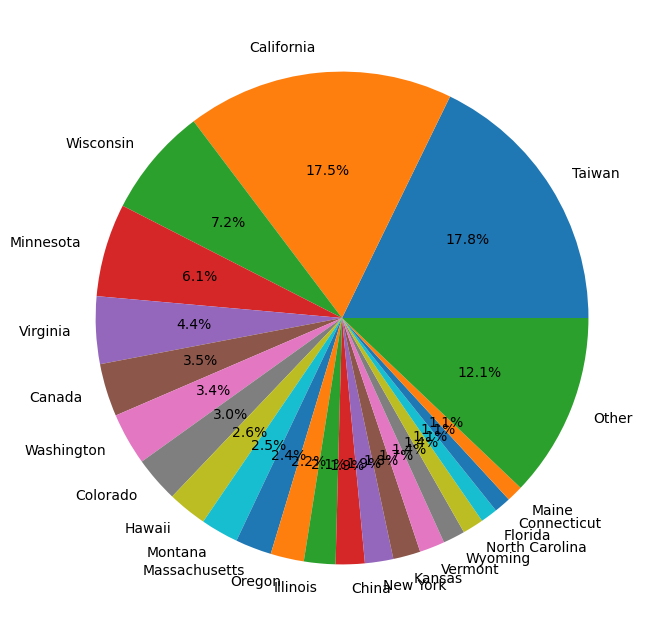

In [44]:
 data_dict = dfclean10['Roaster Location:'].value_counts().to_dict()
data_dict
 # merge the least common locations (under 1%) into a single category called "Other".
threshold =50
other_count = sum(count for count in data_dict.values() if count < threshold)
data_dict = {k: v for k, v in data_dict.items() if v >= threshold}
data_dict['Other'] = other_count

# create a pie chart from the updated dictionary
plt.figure(figsize=(8, 8))
plt.pie(data_dict.values(), labels=data_dict.keys(),autopct='%1.1f%%')

# show the pie chart
plt.show()

In [45]:
# create a dictionary with mappings
location_dict = {'Virginia': 1, 'Vermont': 2, 'Colorado': 3, 'Wyoming': 4, 'Oregon': 5, 'Montana': 6, 
                 'Utah': 7, 'California': 8, 'Kansas': 9, ' California': 8, 'Arizona': 10, 'Hawaii': 11, 
                 'Taiwan': 12, 'Wisconsin': 13, 'Illinois': 14, 'Minnesota': 15, 'Ohio': 16, 'Georgia': 17, 
                 'Maine': 18, 'China': 19, 'North Carolina': 20, 'New York': 21, 'Connecticut': 22, 'Alaska': 23, 
                 'Guatemala': 24, 'New Jersey': 25, 'Florida': 26, 'Japan': 27, 'Nevada': 28, 'Canada': 29, 
                 'Texas': 30, 'Michigan': 31, 'Massachusetts': 32, 'Oklahoma': 33, 'Kenya': 34, 'New Mexico': 35, 
                 'Washington': 36, 'New Hampshire': 37, 'Pennsylvania': 38, 'Alabama': 39, 'DC': 40, 
                 'Colombia': 41, 'Tennessee': 42, 'Mexico': 43, 'Honduras': 44, 'Peru': 45, 'Missouri': 46, 
                 'Mississippi': 47, 'Iowa': 48, 'Maryland': 49, 'Washingto': 36, 'Laos': 50, 'Indonesia': 51, 
                 'Australia': 52, 'United Arab Emirates': 53, 'Louisiana': 54, 'Thailand': 55, 'Uganda': 56, 
                 'Idaho': 57, 'Californiaa': 8, 'South Korea': 58, 'Kentucky': 59, 
                 'Democratic Republic of the Congo': 60, 'Rwanda': 61, 'Puerto Rico': 62, 'Tempe Arizona': 10, 
                 'Germany': 63, 'El Salvador': 64, 'Indiana': 65, 'Italy': 66, 'Switzerland': 67, 'Costa Rica': 68, 
                 'Sacr': 69, 'Kona': 70, 'Nebraska': 71, 'South Dakota': 72, 'Sweden': 73, 'Arkansas': 74, 
                 'British Colombia': 75, 'France': 76, 'Rhode Island': 77}

# apply the mapping to the column using the map() method
dfclean10['Roaster Location:'] = dfclean10['Roaster Location:'].map(location_dict)

In [46]:
dfclean10['Roaster Location:'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77], dtype=int64)

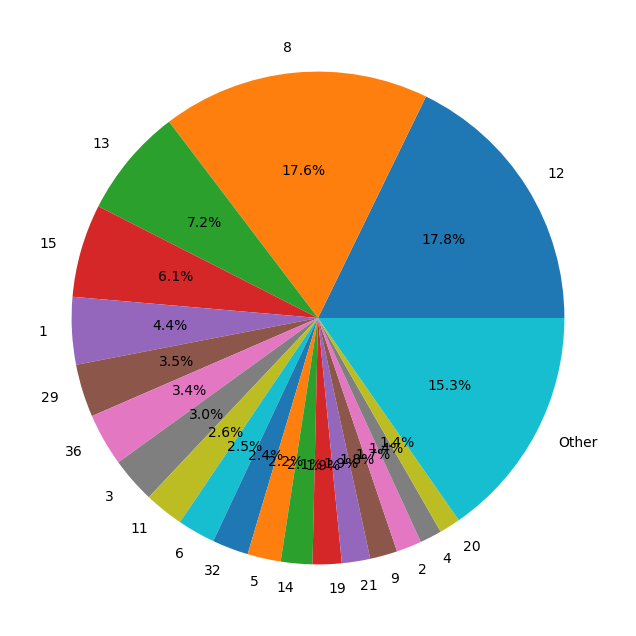

In [50]:
 data_dict = dfclean10['Roaster Location:'].value_counts().to_dict()
data_dict
 # merge the least common locations (under 1%) into a single category called "Other", there are 24 in total.
threshold =55
other_count = sum(count for count in data_dict.values() if count < threshold)
data_dict = {k: v for k, v in data_dict.items() if v >= threshold}
data_dict['Other'] = other_count

# create a pie chart from the updated dictionary
plt.figure(figsize=(8, 8))
plt.pie(data_dict.values(), labels=data_dict.keys(),autopct='%1.1f%%')

# show the pie chart
plt.show()

In [51]:
 dfclean10. info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4843 entries, 0 to 5286
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Coffee Name        4843 non-null   object 
 1   Company Name       4843 non-null   object 
 2   Origin country     4843 non-null   object 
 3   Roaster Location:  4843 non-null   int64  
 4   Roast Level        4843 non-null   float64
 5   Agtron             4843 non-null   float64
 6   Price              4843 non-null   float64
 7   Rating             4843 non-null   float64
 8   Review Date        4843 non-null   int32  
 9   Aroma              4843 non-null   float64
 10  Acidity            4843 non-null   float64
 11  Body               4843 non-null   float64
 12  Flavor             4843 non-null   float64
 13  Aftertaste         4843 non-null   float64
dtypes: float64(9), int32(1), int64(1), object(3)
memory usage: 548.6+ KB


In [52]:
dfclean10.drop_duplicates().shape

(4843, 14)